# Vehicle Damage/Scratch Detection using YOLOv11

**Autores:**
+ Carlos Vallejo 
+ Alvaro Marro Dorado
+ Juan Manuel Piedrabuena Marañón
+ Mynor Hernández Montero

# Resumen Ejecutivo

## Objetivo
Desarrollar un modelo de deep learning capaz de detectar daño, raspones, abolladuras, usando YOLO Object Detection

## Definición del Problema

En la industria aseguradora y de evaluación de daños, la inspección de vehículos sigue siendo en gran parte un proceso manual, lento y dependiente del criterio humano. Esto genera variabilidad en los diagnósticos, mayores tiempos de respuesta y costos operativos elevados. Nuestro proyecto propone una solución basada en visión por computador capaz de detectar automáticamente rayones en vehículos mediante bounding boxes con niveles de confianza, permitiendo identificar con precisión la ubicación del daño. Esta automatización no solo reduce el error humano y acelera la inspección, sino que también libera al personal para enfocarse en análisis de mayor valor. La solución es escalable a aseguradoras, talleres mecánicos, empresas de leasing y plataformas de inspección digital, posicionándose como una herramienta clave dentro del ecosistema InsurTech y la automatización inteligente.

## Definición de la Solición

El presente proyecto propone el desarrollo de un modelo inteligente capaz de detectar automáticamente daños, rayaduras, abolladuras o algún otro tipo de defecto en vehículos de alquiler devueltos luego del alquiler a partir de imágenes o vídeos 360°. El sistema utilizará técnicas de visión por computadora e inteligencia artificial y datos, entrenadas con un conjunto de datos compuesto por imágenes de autos en buen estado y con distintos tipos de daños.
Además el sistema generará un estudio de clientes basado en el historial de uso de la compañía y un análisis demográfico con ciertos indicadores, dando un score de riesgo de cada usuario lo cual puede ayudar en la toma de decisiones de pricing, fianzas, seguros y demás.  
El objetivo es automatizar y agilizar la inspección visual de vehículos en rent a car, reduciendo errores humanos, tiempos de revisión y disputas entre clientes y empresas.


# Datos

### Dataset
- Source: Roboflow
- Classes: crack, dent, glass shatter, lamp broken, scratch, tire flat	
- Total images: 4328
- Train / Val / Test split: 70% / 20% / 10%

# Arquitectura de Solución

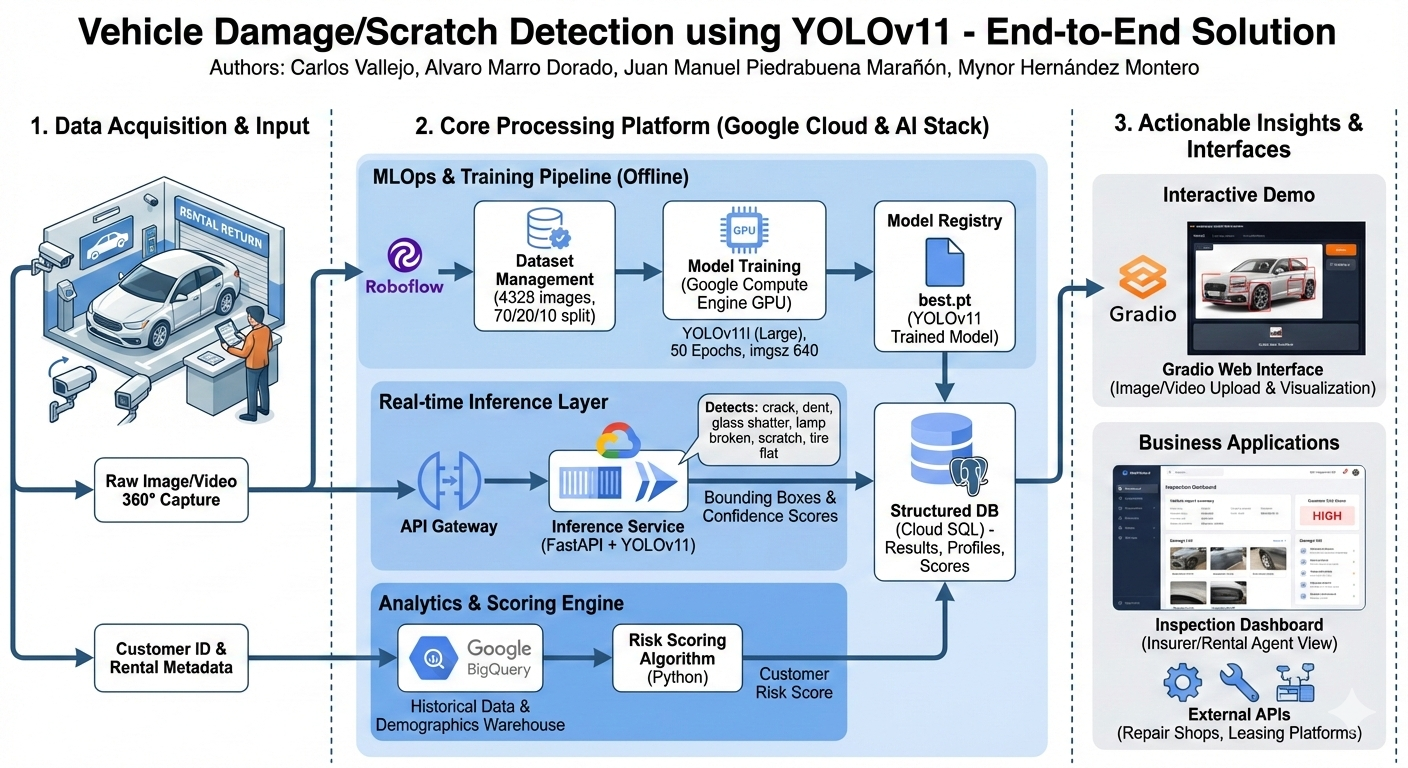

# Resultados obtenidos

### Lectura de Metricas

#### 1. Métricas de Error (Pérdidas / Loss)
Estos valores miden "qué tan mal" lo está haciendo el modelo. Durante el entrenamiento, el objetivo es que estos números disminuyan en cada época.

##### box_loss (Pérdida de caja): 
Mide la precisión con la que el modelo ubica el arañazo. Si el recuadro que dibuja el modelo no coincide exactamente con el que tú dibujaste en Roboflow, este número sube. Una bajada constante indica que el modelo está aprendiendo a ajustar los bordes perfectamente al daño.

##### cls_loss (Pérdida de clasificación): 
Como tienes 13 clases (arañazo, abolladura, cristal roto, etc.), esta métrica mide si el modelo identifica la categoría correcta. Si detecta un arañazo pero dice que es una abolladura, este error sube.

##### dfl_loss (Distribution Focal Loss): 
Es una métrica técnica que ayuda al modelo a refinar los límites de las cajas cuando los bordes son borrosos o difíciles de definir (como un arañazo muy fino). Ayuda a que la caja sea más "ajustada".


#### 2. Métricas de Rendimiento (El Examen)
Estas métricas se calculan al final de cada época usando las 827 imágenes de validación. Aquí, el objetivo es que los números suban (lo más cerca posible de 1.0).

##### Instances: 
Es el número total de objetos (daños) que el modelo intentó encontrar en el set de validación (en tu caso, 1783).

##### Box(P) (Precisión): 
Responde a la pregunta: "De todas las veces que el modelo dijo 'aquí hay un arañazo', ¿qué porcentaje era real?".

Ejemplo: Si P es 0.72, significa que el 72% de sus detecciones son correctas, pero un 28% son falsas alarmas (falsos positivos).

##### R (Recall / Sensibilidad): 
Responde a: "De todos los arañazos que existen en las fotos, ¿cuántos logró encontrar el modelo?".

Ejemplo: Si R es 0.34, el modelo solo está encontrando el 34% de los daños reales; se le están escapando muchos (falsos negativos).

##### mAP50 (Mean Average Precision at 0.5): 
Es la métrica más importante para tu proyecto de clase. Mide la precisión media cuando el recuadro del modelo coincide al menos en un 50% con tu etiqueta original. Es el balance entre Precisión y Recall.

##### mAP50-95: 
Es la métrica más estricta de la industria. Promedia la precisión desde un ajuste del 50% hasta uno casi perfecto del 95%. Si este número es alto, tu modelo es de nivel profesional.

##### Lo ideal es que al final de las 100 épocas (o cuando decidas pararlo):

Box(P) y R estén equilibrados (por ejemplo, ambos por encima de 0.6).

mAP50 sea superior a 0.5 o 0.6 para que las detecciones en video sean estables.

### mAP50

El mAP50 es la métrica más importante en detección de objetos, pero es un poco abstracta al principio. Para entenderla, primero debemos entender qué es el IoU (Intersection over Union).

1. El concepto de "Caja Correcta" (IoU)
Cuando el modelo detecta un arañazo, dibuja una caja. El sistema compara esa caja con la que tú dibujaste (la etiqueta real).

IoU (Intersección sobre Unión): Es el porcentaje de superposición entre la caja del modelo y tu etiqueta.

Si la caja del modelo coincide perfectamente, el IoU es 1.0 (100%).

Si la caja del modelo está lejos del daño, el IoU es 0.

2. ¿Qué significa el "50" en mAP50?
El "50" es el umbral de aprobación.

Para que una detección se considere "correcta" en esta métrica, el modelo debe haber logrado un IoU de al menos 0.50 (50%).

Es como si el profesor dijera: "Si tu recuadro cubre al menos la mitad del arañazo real, te la doy por buena".

3. Rompiendo las siglas: mAP
P (Precision): ¿Es fiable? De 10 cajas que dibujó, ¿cuántas tenían un IoU > 0.50?

AP (Average Precision): Es el promedio de esa precisión para una clase (por ejemplo, solo para "scratches").

m (Mean): Como tú tienes 13 clases, el sistema calcula el AP de cada una y luego hace la media (Mean) de todas.

En resumen, para tu proyecto:
Si tu mAP50 es 0.33 (33%): Significa que, promediando tus 13 tipos de daños, el modelo solo está logrando poner cajas "decentes" (que coinciden al menos un 50% con la realidad) en una tercera parte de los casos.

¿Por qué hay otro que se llama mAP50-95? Ese es mucho más estricto. No se conforma con un 50% de coincidencia; exige que las cajas sean casi perfectas (hasta un 95% de coincidencia) para darles una buena nota. Si el mAP50 es la nota de un examen "fácil", el mAP50-95 es la nota del examen para expertos.

# Conclusiones y próximos pasos

# Librerias

In [8]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gradio as gr
import cv2
import numpy as np
from PIL import Image

# Dataset import with Roboflow

In [17]:
rf = Roboflow(api_key="Re7EXPsDbI2WxmePrafM")
project = rf.workspace("miotistudent").project("bb_cardamage-final")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


# Roboflow Images Validation and Correction

In [15]:
def fix_img_labels(directory):
    if not os.path.exists(directory):
        print(f"Saltando: {directory} ay que no existe")
        return

    count_track = 0
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            path = os.path.join(directory, filename)
            with open(path, 'r') as f:
                lines = f.readlines()

            fixed_lines = []
            for line in lines:
                parts = line.split()
                if len(parts) >= 5:
                    cls = parts[0]
                    # Ajustamos las coordenadas al rango [0, 1]
                    coords = [max(0.0, min(1.0, float(x))) for x in parts[1:]]
                    fixed_line = f"{cls} " + " ".join([f"{c:.6f}" for c in coords]) + "\n"
                    fixed_lines.append(fixed_line)

            with open(path, 'w') as f:
                f.writelines(fixed_lines)
            count_track += 1
    print(f"Se repararon {count_track} archivos en el path: {directory}")

# Intentar con ambos nombres comunes: 'val' y 'valid'
for folder in ['train', 'valid', 'test']:
    fix_img_labels(f"{dataset.location}/{folder}/labels")

Se repararon 3349 archivos en el path: /Users/mynorhm/Desktop/MIOTI/PROYECTO_FINAL/BB_CarDamage-Final-1/train/labels
Se repararon 838 archivos en el path: /Users/mynorhm/Desktop/MIOTI/PROYECTO_FINAL/BB_CarDamage-Final-1/valid/labels
Se repararon 429 archivos en el path: /Users/mynorhm/Desktop/MIOTI/PROYECTO_FINAL/BB_CarDamage-Final-1/test/labels


# Model training

In [5]:
from ultralytics import YOLO
import os

# 1. Definir el modelo (m = medium, balance ideal entre velocidad y precisión)
# También puedes usar 'yolo11n.pt' (nano) o 'yolo11x.pt' (extra large)
model_name = 'yolo11l.pt'

# Limpieza opcional para asegurar una descarga fresca
if os.path.exists(model_name):
    os.remove(model_name)

# 2. Cargar el modelo YOLOv11
model = YOLO(model_name)

# 3. Entrenar el modelo
# Asegúrate de haber exportado tu dataset desde Roboflow como "YOLOv11" o "YOLOv8" (formato estándar)
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,      # Puedes subirlo a 100 si tienes tiempo, v11 aprende muy rápido
    imgsz=640,      # Tamaño de imagen estándar
    batch=16,       # Al no ser OBB, puedes intentar subir el batch si la GPU lo permite
    device='0',     # Usa 0 para GPU NVIDIA (Tesla T4 en Colab)
    project='CarDamage_v11', # Nombre de la carpeta de resultados
    name='experimento_estandar'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BB_CarDamage-Final-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=6

In [6]:
# 4. Evaluación final con el set de TEST
print("Iniciando evaluación final con imágenes de TEST...")
metrics = model.val(split='test') # Esto le dice a YOLO: "Usa la carpeta test del data.yaml"

# 5. Opcional: Probar el modelo con una imagen real del test para ver los cuadritos
results_pred = model.predict(source=f"{dataset.location}/test/images", save=True, imgsz=640)

Iniciando evaluación final con imágenes de TEST...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11l summary (fused): 191 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 21.9±10.5 MB/s, size: 42.9 KB)
val: Scanning /content/BB_CarDamage-Final-1/test/labels... 429 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 429/429 720.0it/s 0.6s
val: New cache created: /content/BB_CarDamage-Final-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 1.7it/s 16.1s
                   all        429        948      0.724        0.7      0.733      0.588
                 crack         70        103       0.59      0.359      0.416      0.231
                  dent        183        260      0.625      0.514       0.57      0.338
         glass shatter         55         55      0.934          1      0.995      0.947
       


image 1/429 /content/BB_CarDamage-Final-1/test/images/000001_jpg.rf.9abbb12e8b3569fe8990b3bb3d09cab0.jpg: 512x640 1 scratch, 1 tire flat, 38.9ms
image 2/429 /content/BB_CarDamage-Final-1/test/images/000021_jpg.rf.9f669b8e805d44abde8e1a8e7fb0eddd.jpg: 512x640 1 scratch, 38.9ms
image 3/429 /content/BB_CarDamage-Final-1/test/images/000024_jpg.rf.7422a881e8f247dc9067ad77ec7a5a3b.jpg: 512x640 1 lamp broken, 1 scratch, 38.9ms
image 4/429 /content/BB_CarDamage-Final-1/test/images/000025_jpg.rf.3b983fa52344ac0f23505522454b4801.jpg: 512x640 1 lamp broken, 1 scratch, 31.8ms
image 5/429 /content/BB_CarDamage-Final-1/test/images/000027_jpg.rf.84461cd03537b4911ee29c604f382f4c.jpg: 512x640 1 scratch, 26.4ms
image 6/429 /content/BB_CarDamage-Final-1/test/images/000041_jpg.rf.ee52487143e68f2ef2fea3d2f4e26ce9.jpg: 512x640 1 glass shatter, 26.4ms
image 7/429 /content/BB_CarDamage-Final-1/test/images/000044_jpg.rf.e84994ba89425a4a9b6c3144d6c7c3d8.jpg: 512x640 3 cracks, 1 dent, 2 scratchs, 26.0ms
image 8

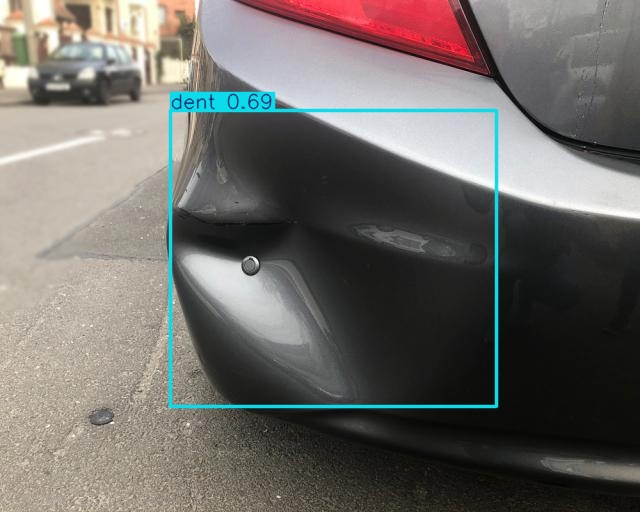

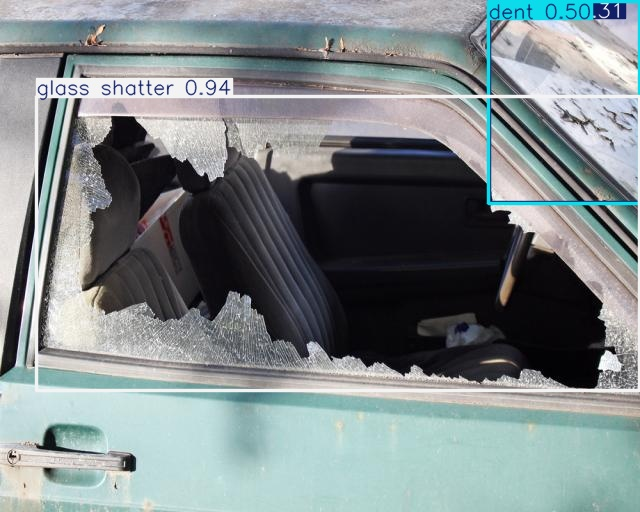

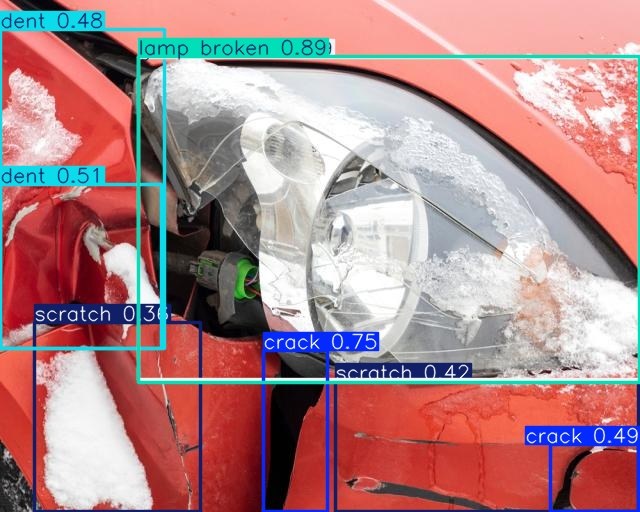

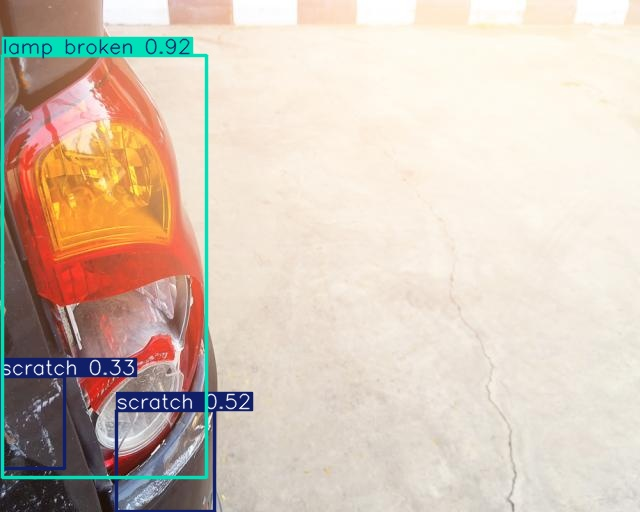

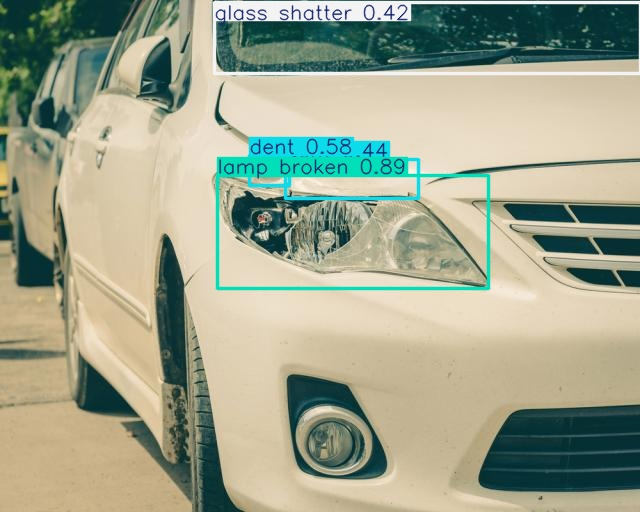

In [8]:
# 1. Ejecutar predicción en el set de test (si no lo hiciste)
model.predict(source=f"{dataset.location}/test/images", save=True, imgsz=640)

# 2. Buscar la carpeta 'predict' más nueva
latest_predict = sorted(glob.glob('runs/detect/predict*/'))[-1]
pred_images = glob.glob(os.path.join(latest_predict, "*.jpg"))

print(f"Mostrando imágenes desde: {latest_predict}")

# 3. Mostrar las primeras 5 imágenes para validar
for img_path in pred_images[:5]:
    display(Image(filename=img_path, width=600))

In [24]:
model = YOLO('./Results_1702_YOLO11L/CarDamage_v11/experimento_estandar/weights/best.pt')

In [31]:
import gradio as gr
import cv2
import numpy as np
import tempfile
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ============================================================
# 🔧 CONVERTIR VIDEO A FORMATO COMPATIBLE (sin ffmpeg)
# ============================================================

def convert_video_opencv(input_path: str, fps: int, width: int, height: int) -> str:
    """
    Re-encodea el video usando OpenCV con codec H.264 compatible
    """
    cap = cv2.VideoCapture(input_path)
    output_path = input_path.replace('_raw.mp4', '_h264.mp4')
    
    # Probar diferentes codecs en orden de preferencia
    codecs_to_try = [
        ('avc1', '.mp4'),  # H.264 en Mac
        ('H264', '.mp4'),  # H.264 genérico
        ('mp4v', '.mp4'),  # MPEG-4
    ]
    
    out = None
    for codec, ext in codecs_to_try:
        try:
            fourcc = cv2.VideoWriter_fourcc(*codec)
            test_path = output_path.replace('.mp4', ext)
            out = cv2.VideoWriter(test_path, fourcc, fps, (width, height))
            
            if out.isOpened():
                output_path = test_path
                print(f"✅ Usando codec: {codec}")
                break
            else:
                out.release()
                out = None
        except:
            continue
    
    if out is None or not out.isOpened():
        print("⚠️ No se pudo crear video compatible, usando original")
        cap.release()
        return input_path
    
    # Re-escribir el video frame por frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
    
    cap.release()
    out.release()
    
    # Limpiar temporal
    if os.path.exists(input_path):
        os.remove(input_path)
    
    return output_path


# ============================================================
# 🔧 FUNCIONES DE DETECCIÓN
# ============================================================

def detect_image(image, confidence, show_labels, show_conf):
    if image is None:
        return None, "⚠️ Por favor sube una imagen"

    results = model.predict(image, conf=confidence, verbose=False)[0]
    annotated = results.plot(labels=show_labels, conf=show_conf)
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    num_det = len(results.boxes)
    if num_det > 0:
        classes     = results.boxes.cls.cpu().numpy()
        confs       = results.boxes.conf.cpu().numpy()
        class_names = results.names

        summary = f"### ✅ {num_det} detección{'es' if num_det>1 else ''} encontrada{'s' if num_det>1 else ''}\n\n"
        summary += "| Clase | Cantidad | Confianza Prom. |\n|---|---|---|\n"
        for cls_id in np.unique(classes):
            name     = class_names[int(cls_id)]
            count    = int(np.sum(classes == cls_id))
            avg_conf = float(np.mean(confs[classes == cls_id]))
            summary += f"| 🔴 **{name}** | {count} | {avg_conf:.2%} |\n"
    else:
        summary = "### ✅ No se detectaron daños en esta imagen"

    return annotated_rgb, summary


def process_video(video_path, confidence, show_labels, show_conf):
    if video_path is None:
        return None, None, "⚠️ Por favor sube un video"

    cap          = cv2.VideoCapture(video_path)
    fps          = int(cap.get(cv2.CAP_PROP_FPS)) or 25
    width        = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height       = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Temporal raw
    tmp_raw  = tempfile.NamedTemporaryFile(delete=False, suffix='_raw.mp4')
    raw_path = tmp_raw.name
    tmp_raw.close()

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out    = cv2.VideoWriter(raw_path, fourcc, fps, (width, height))

    frames_list    = []
    detections     = []
    conf_per_frame = []
    class_totals   = {}

    frame_idx = 0
    print("🎬 Procesando video...")
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, conf=confidence, verbose=False)[0]
        annotated_frame = results.plot(labels=show_labels, conf=show_conf)
        out.write(annotated_frame)

        num_det  = len(results.boxes)
        avg_conf = float(results.boxes.conf.mean()) if num_det > 0 else 0.0

        frames_list.append(frame_idx)
        detections.append(num_det)
        conf_per_frame.append(avg_conf)

        if num_det > 0:
            for cls_id in results.boxes.cls.cpu().numpy():
                name = results.names[int(cls_id)]
                class_totals[name] = class_totals.get(name, 0) + 1

        frame_idx += 1
        if frame_idx % 30 == 0:
            print(f"  Frame {frame_idx}/{total_frames}")

    cap.release()
    out.release()

    # Convertir a formato compatible
    print("🔄 Convirtiendo a formato compatible...")
    processed_path = convert_video_opencv(raw_path, fps, width, height)
    print(f"✅ Video procesado: {processed_path}")

    # ── Gráfica ────────────────────────────────────────────
    fig = plt.figure(figsize=(16, 6), facecolor='#0f0f0f')
    gs  = GridSpec(1, 3, figure=fig, hspace=0.3, wspace=0.4)

    ACCENT  = '#00e5ff'
    ACCENT2 = '#ff4081'
    GRIDCOL = '#2a2a2a'
    TEXTCOL = '#e0e0e0'

    # 1. Detecciones por frame
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_facecolor('#1a1a1a')
    ax1.fill_between(frames_list, detections, alpha=0.25, color=ACCENT)
    ax1.plot(frames_list, detections, color=ACCENT, linewidth=2)
    ax1.set_title('Detecciones / Frame', color=TEXTCOL, fontsize=11, fontweight='bold', pad=10)
    ax1.set_xlabel('Frame', color=TEXTCOL, fontsize=9)
    ax1.set_ylabel('Nº Detecciones', color=TEXTCOL, fontsize=9)
    ax1.tick_params(colors=TEXTCOL, labelsize=8)
    ax1.grid(True, color=GRIDCOL, linestyle='--', alpha=0.6)
    for spine in ax1.spines.values(): spine.set_edgecolor('#333')

    # 2. Confianza promedio
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_facecolor('#1a1a1a')
    ax2.fill_between(frames_list, conf_per_frame, alpha=0.25, color=ACCENT2)
    ax2.plot(frames_list, conf_per_frame, color=ACCENT2, linewidth=2)
    ax2.set_title('Confianza Promedio', color=TEXTCOL, fontsize=11, fontweight='bold', pad=10)
    ax2.set_xlabel('Frame', color=TEXTCOL, fontsize=9)
    ax2.set_ylabel('Confianza', color=TEXTCOL, fontsize=9)
    ax2.set_ylim(0, 1)
    ax2.tick_params(colors=TEXTCOL, labelsize=8)
    ax2.grid(True, color=GRIDCOL, linestyle='--', alpha=0.6)
    for spine in ax2.spines.values(): spine.set_edgecolor('#333')

    # 3. Distribución de clases
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.set_facecolor('#1a1a1a')
    if class_totals:
        colors_pie = [ACCENT, ACCENT2, '#ffd740', '#69ff47', '#ff6d00']
        wedges, texts, autotexts = ax3.pie(
            class_totals.values(),
            labels=class_totals.keys(),
            autopct='%1.1f%%',
            colors=colors_pie[:len(class_totals)],
            textprops={'color': TEXTCOL, 'fontsize': 9},
            wedgeprops={'linewidth': 1.5, 'edgecolor': '#0f0f0f'}
        )
        for at in autotexts:
            at.set_color('#0f0f0f')
            at.set_fontweight('bold')
    else:
        ax3.text(0.5, 0.5, 'Sin detecciones', ha='center', va='center',
                 color=TEXTCOL, fontsize=10)
    ax3.set_title('Distribución de Clases', color=TEXTCOL, fontsize=11, fontweight='bold', pad=10)

    plt.suptitle('📊 Análisis del Video — YOLO Detector',
                 color=TEXTCOL, fontsize=14, fontweight='bold', y=0.98)

    tmp_fig = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    fig.savefig(tmp_fig.name, dpi=120, bbox_inches='tight',
                facecolor='#0f0f0f', edgecolor='none')
    plt.close(fig)

    # ── Resumen ────────────────────────────────────────────
    total_det        = sum(detections)
    frames_w_det     = sum(1 for d in detections if d > 0)
    avg_conf_global  = np.mean([c for c in conf_per_frame if c > 0]) if any(c > 0 for c in conf_per_frame) else 0
    duration_s       = total_frames / fps

    summary = f"""
### 📋 Resumen del Análisis

| Métrica | Valor |
|---|---|
| 🎬 Frames totales | `{total_frames}` |
| ⏱️ Duración | `{duration_s:.1f}s` |
| 🖥️ Resolución | `{width}×{height}` |
| ⚡ FPS | `{fps}` |
| 🔍 Frames con detecciones | `{frames_w_det}` / `{total_frames}` (`{frames_w_det/total_frames*100:.1f}%`) |
| 📦 Total detecciones | `{total_det}` |
| 🎯 Confianza promedio | `{avg_conf_global:.2%}` |

**Detecciones por clase:**\n
"""
    for cls_name, count in class_totals.items():
        summary += f"- 🔴 **{cls_name}**: {count} detecciones\n"

    if not class_totals:
        summary += "_No se detectaron objetos en el video_\n"

    return processed_path, tmp_fig.name, summary


# ============================================================
# 🎨 INTERFAZ GRADIO — REDISEÑADA
# ============================================================

gr.close_all()

CUSTOM_CSS = """
@import url('https://fonts.googleapis.com/css2?family=Space+Mono:wght@400;700&family=DM+Sans:wght@300;400;600&display=swap');

body, .gradio-container { font-family: 'DM Sans', sans-serif !important; background: #0a0a0a !important; }
h1, h2, h3, .gr-button { font-family: 'Space Mono', monospace !important; }

.app-header {
    background: linear-gradient(135deg, #0a0a0a 0%, #1a1a2e 50%, #16213e 100%);
    border-bottom: 1px solid #00e5ff33;
    padding: 2rem; text-align: center;
    margin-bottom: 1.5rem; border-radius: 12px;
}
.app-header h1 { color: #00e5ff; font-size: 2rem; letter-spacing: 2px; margin-bottom: 0.4rem; }
.app-header p  { color: #888; font-size: 0.9rem; letter-spacing: 1px; }

.tab-nav button { 
    font-family: 'Space Mono', monospace !important; 
    font-size: 0.85rem !important; 
    letter-spacing: 1px !important; 
    color: #888 !important; 
    border-bottom: 2px solid transparent !important; 
    transition: all 0.3s ease !important; 
}
.tab-nav button.selected { color: #00e5ff !important; border-bottom-color: #00e5ff !important; }

.gr-button-primary { 
    background: linear-gradient(135deg, #00e5ff, #0072ff) !important; 
    border: none !important; 
    color: #000 !important; 
    font-weight: 700 !important; 
    letter-spacing: 1px !important; 
    border-radius: 6px !important; 
    transition: all 0.3s ease !important; 
}
.gr-button-primary:hover { 
    transform: translateY(-2px) !important; 
    box-shadow: 0 8px 20px #00e5ff44 !important; 
}

.gr-panel, .gr-box { background: #111 !important; border: 1px solid #222 !important; border-radius: 10px !important; }

.gr-markdown h3 { color: #00e5ff; }
.gr-markdown table { border-collapse: collapse; width: 100%; }
.gr-markdown td, .gr-markdown th { border: 1px solid #222; padding: 6px 12px; color: #ccc; }
.gr-markdown th { background: #1a1a1a; color: #00e5ff; }
"""

with gr.Blocks(css=CUSTOM_CSS, title="🚗 Car Damage Detector") as demo:

    gr.HTML("""
    <div class="app-header">
        <h1>🚗 CAR DAMAGE DETECTOR</h1>
        <p>YOLOv8 · Detección de Arañazos y Daños · Proyecto Final de Curso</p>
    </div>
    """)

    with gr.Tabs():

        # ══════════════════════════════════════════════════════
        # TAB 1: IMAGEN
        # ══════════════════════════════════════════════════════
        with gr.Tab("📷  Imagen"):
            
            with gr.Row():
                # Columna izquierda — entrada
                with gr.Column(scale=1):
                    img_input = gr.Image(type="numpy", label="📸 Sube tu imagen")
                    img_conf  = gr.Slider(0.0, 1.0, value=0.5, step=0.05, label="🎯 Umbral de Confianza")
                    
                    with gr.Row():
                        img_labels = gr.Checkbox(value=True, label="🏷️ Etiquetas")
                        img_confch = gr.Checkbox(value=True, label="📊 Confianza")
                    
                    img_btn = gr.Button("🔍  Detectar Daños", variant="primary", size="lg")

                # Columna derecha — salida
                with gr.Column(scale=1):
                    img_output  = gr.Image(type="numpy", label="🎯 Resultado")
                    img_summary = gr.Markdown(label="📋 Resumen")

            # Ejemplos en cuadrícula
            gr.Markdown("### 📂 Ejemplos de Prueba")
            gr.Examples(
                examples=[
                    ["./Results_1702_YOLO11L/predict/ej1.jpg", 0.5, True, True],
                    ["./Results_1702_YOLO11L/predict/ej2.jpg", 0.4, True, True],
                    ["./Results_1702_YOLO11L/predict/ej3.jpg", 0.6, True, False],
                    ["./Results_1702_YOLO11L/predict/ej4.jpg", 0.5, False, True],
                ],
                inputs=[img_input, img_conf, img_labels, img_confch],
                outputs=[img_output, img_summary],
                fn=detect_image,
                cache_examples=False,
                examples_per_page=4
            )

            img_btn.click(
                fn=detect_image,
                inputs=[img_input, img_conf, img_labels, img_confch],
                outputs=[img_output, img_summary]
            )

        # ══════════════════════════════════════════════════════
        # TAB 2: VIDEO
        # ══════════════════════════════════════════════════════
        with gr.Tab("🎥  Video"):
            
            # Fila superior — videos lado a lado
            gr.Markdown("### 🎞️ Procesamiento de Video")
            with gr.Row():
                # Columna 1: Video entrada + controles
                with gr.Column(scale=1):
                    vid_input = gr.Video(label="📹 Sube tu video")
                    vid_conf  = gr.Slider(0.0, 1.0, value=0.5, step=0.05, label="🎯 Umbral de Confianza")
                    
                    with gr.Row():
                        vid_labels = gr.Checkbox(value=True, label="🏷️ Etiquetas")
                        vid_confch = gr.Checkbox(value=True, label="📊 Confianza")
                    
                    vid_btn = gr.Button("🎬  Procesar Video", variant="primary", size="lg")

                # Columna 2: Video procesado
                with gr.Column(scale=1):
                    vid_processed = gr.Video(label="🎯 Video Procesado")

            # Fila inferior — métricas
            gr.Markdown("### 📊 Análisis y Estadísticas")
            
            with gr.Row():
                vid_summary = gr.Markdown(label="📋 Resumen")
            
            with gr.Row():
                vid_plot = gr.Image(type="filepath", label="Gráficas de Detección")

            vid_btn.click(
                fn=process_video,
                inputs=[vid_input, vid_conf, vid_labels, vid_confch],
                outputs=[vid_processed, vid_plot, vid_summary]
            )

    # Footer
    gr.HTML("""
    <div style="text-align:center; padding: 1.5rem; color:#444;
                font-family:'Space Mono',monospace; font-size:0.75rem;
                border-top: 1px solid #1a1a1a; margin-top: 1.5rem;">
        YOLOv8 · Ultralytics · Gradio &nbsp;|&nbsp; Proyecto Final · MIOTI 2024
    </div>
    """)

demo.launch(share=True, inbrowser=True)

The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: css. Please pass these parameters to launch() instead.


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://cba75f278f3ad4e8b3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [32]:
# Cerrar la última sesión de Gradio
demo.close()

# O cerrar todas las sesiones activas
gr.close_all()

Closing server running on port: 7860
